# [Porto Seguro Data Challenge | Kaggle](https://www.kaggle.com/c/porto-seguro-data-challenge)

## Objetivo  

O objetivo é construir um modelo de propensão que prediz a probabilidade de aquisição de um produto.

## Conteúdo

1. Leitura dos dados
  - Dataframe com Python Pandas
2. Identificação da variável resposta (*y*)
  - Graficar distribuição
3. Exploração de variáveis explicativas (*X*)
  - Valores faltantes
  - Valores únicos
4. Modelo aleatório
  - Classificador aleatório
  - Métrica F1 score
5. Treinamento do modelo
  - Definir transformações
  - Balanceamento de amostra
  - Escolher algoritmo de classificação
  - Execução do pipeline
6. Criar arquivo de previsões
  - Submeter solução para a plataforma do Kaggle

# 1. Leitura dos dados

In [1]:
import pandas as pd

In [2]:
path = 'data/train.csv.zip'

kargs = {
    'index_col': 'id',
    'na_values': -999.,
}
df = pd.read_csv(path, **kargs)
df.shape

(14123, 69)

In [3]:
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
id,,,,,,,,,,,,,,,,,,,,,
1,18,19.0,2853.0,29442.0,1386,2435.0,35.0,NaN,3.0,63.0,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
8,4,110.0,1986.0,13684.0,7189,NaN,NaN,17.0,3.0,63.0,...,NaN,NaN,0.070991,0.773966,0.019315,NaN,NaN,0.147059,0.106618,0
30,0,39.0,1019.0,10232.0,678,791.0,16.0,NaN,3.0,63.0,...,NaN,0.200814,0.051046,0.980827,0.018536,NaN,NaN,0.382353,0.242647,0
43,20,39.0,1751.0,2689.0,8235,1042.0,13.0,10.0,1.0,14.0,...,NaN,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
46,7,44.0,2262.0,29428.0,6031,304.0,16.0,NaN,3.0,63.0,...,0.021226,0.226161,0.059125,0.906155,0.020733,NaN,NaN,0.455882,0.132353,1


# 2. Identificação da variável resposta

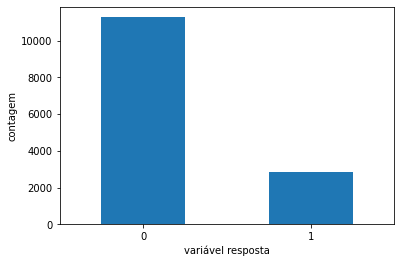

In [4]:
kargs = {
    'rot': 0,
    'xlabel': 'variável resposta',
    'ylabel': 'contagem',
}

df.y.value_counts().plot.bar(**kargs);

# 3. Exploração de variáveis explicativas

In [5]:
import missingno

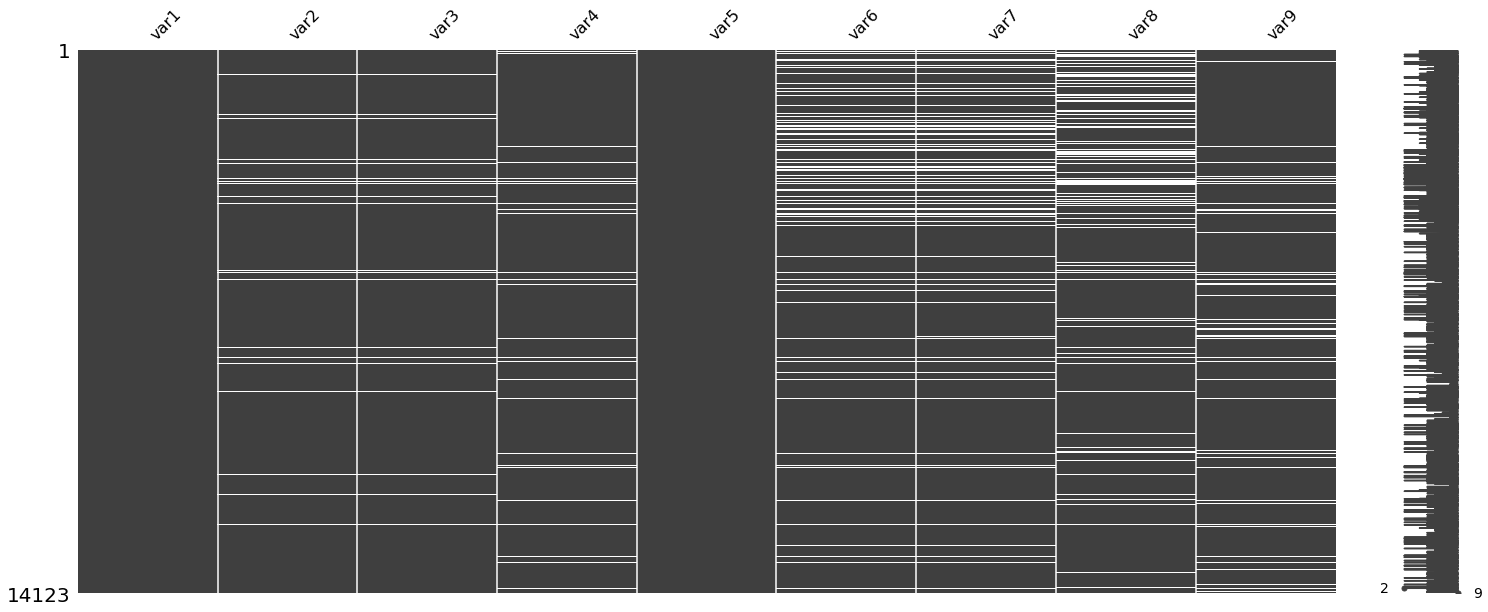

In [6]:
missingno.matrix(df.loc[:, :'var9']);

In [7]:
def plot_hist(df, col):
    bins = df[col].nunique()
    kargs = {
        'figsize': (10, 5),
    }
    ax = df[col].plot.hist(**kargs)
    ax.set_title(f'Valores únicos: {bins}')
    ax.set_xlabel(col)

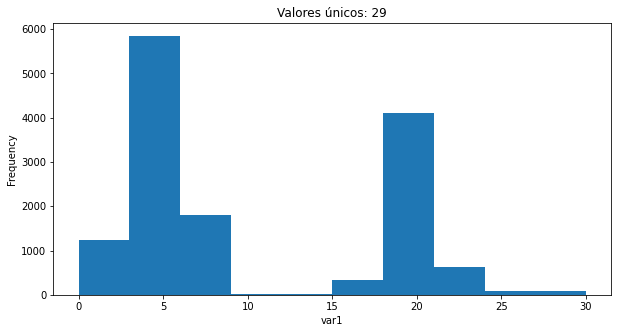

In [8]:
plot_hist(df, 'var1')

In [9]:
def plot_area(df, col):
    kargs = {
        'figsize': (10, 5),
        'ylabel': 'contagem',
    }
    df.groupby([col, 'y'])[col].count().unstack().plot.area(**kargs)

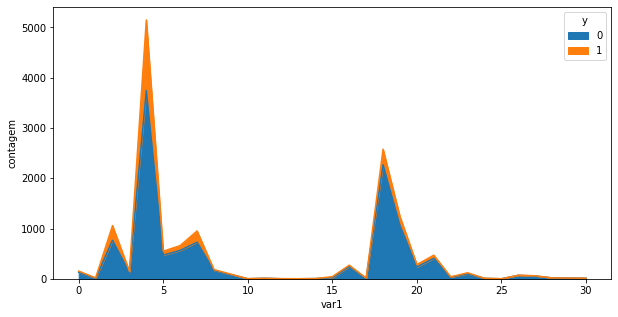

In [10]:
plot_area(df, 'var1')

# 4. Modelo Aleatório

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score


clf = DummyClassifier(strategy='uniform', random_state=42)

X, y = df.drop('y', axis=1), df.y
clf.fit(X, y)

y_pred = clf.predict(y)
score = f1_score(y, y_pred)

print(f'F1-score correspondente a um modelo aleatório: {score:.5f}')

F1-score correspondente a um modelo aleatório: 0.29689


# 5. Treinamento do modelo

In [12]:
from model import Model

In [13]:
n_features = 20
n_bins = 100

model = Model(n_features, n_bins)

In [14]:
%%time
model.train(X, y)

F1-score na iteração 1: 0.00000
F1-score na iteração 2: 0.38580
F1-score na iteração 3: 0.38693
F1-score na iteração 4: 0.56428
F1-score na iteração 5: 0.57219
F1-score na iteração 6: 0.57640
F1-score na iteração 7: 0.57796
F1-score na iteração 8: 0.63597
F1-score na iteração 9: 0.63822
F1-score na iteração 10: 0.63822
F1-score na iteração 11: 0.63822
F1-score na iteração 12: 0.63822
F1-score na iteração 13: 0.63822
F1-score na iteração 14: 0.63822
F1-score na iteração 15: 0.63822
F1-score na iteração 16: 0.63822
F1-score na iteração 17: 0.63822
F1-score na iteração 18: 0.63933
F1-score na iteração 19: 0.63933
F1-score na iteração 20: 0.64437
CPU times: user 2min, sys: 12.8 s, total: 2min 12s
Wall time: 2min 12s


# 6. Criar arquivo de previsões

In [15]:
path = 'data/test.csv.zip'

kargs = {
    'index_col': 'id',
    'na_values': -999.,
}
df_test = pd.read_csv(path, **kargs)
df_test.shape

(21183, 68)

## Submeter solução para a plataforma do Kaggle

Para realizar a submissão utilize o parâmetro `upload=True`. 

In [16]:
outfile = 'submission-2709.csv'
model.submit(df_test, outfile, upload=False)